### Import Packages and Load the data

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as ex
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [2]:
# read data frame.
df = pd.read_csv("diabetes.csv") 

# Initial Exploration of the dataset

In [3]:
# Displaying the first 5 rows of the dataframe
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Checking the dimension of the dataframe
rows, cols = df.shape[0], df.shape[1]
print(f"There are {rows} rows and {cols} columns in the dataframe.")

There are 768 rows and 9 columns in the dataframe.


In [5]:
# Getting overview of the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Statistical details of the dataset (numerical variables only)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data Cleaning

### Handling missing values

In [7]:
# Drop columns with more than 30% missing values
threshold = 0.3  

# Calculate the percentage of missing values in each column
missing_percentages = df.isnull().mean()

# Get the list of columns to drop
columns_to_drop = missing_percentages[missing_percentages > threshold].index

# Drop the columns from the DataFrame
df_dropped = df.drop(columns=columns_to_drop)

df_dropped

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
# categorical and numerical columns
cat_columns = df_dropped.select_dtypes(include=['object']).columns
num_columns = df_dropped.select_dtypes(include=[np.number]).columns

print(f"There are {len(cat_columns)} categorical variables.")
print(f"There are {len(num_columns)} numerical variables.")

There are 0 categorical variables.
There are 9 numerical variables.


In [9]:
# Finding out which of the categorical and numerical columns have null values separately
cat_null_columns = [col for col in cat_columns if df_dropped[col].isnull().any()]
num_null_columns = [col for col in num_columns if df_dropped[col].isnull().any()]

print(f"Categorical columns with null values: {cat_null_columns}")
print(f"Total number of categorical columns with null values: {len(cat_null_columns)}")

print(f"\nNumerical columns with null values: {num_null_columns}")
print(f"Total number of numerical columns with null values: {len(num_null_columns)}")

Categorical columns with null values: []
Total number of categorical columns with null values: 0

Numerical columns with null values: []
Total number of numerical columns with null values: 0


# Visualizing data distributions and relationships

#### Histogram for numerical variables

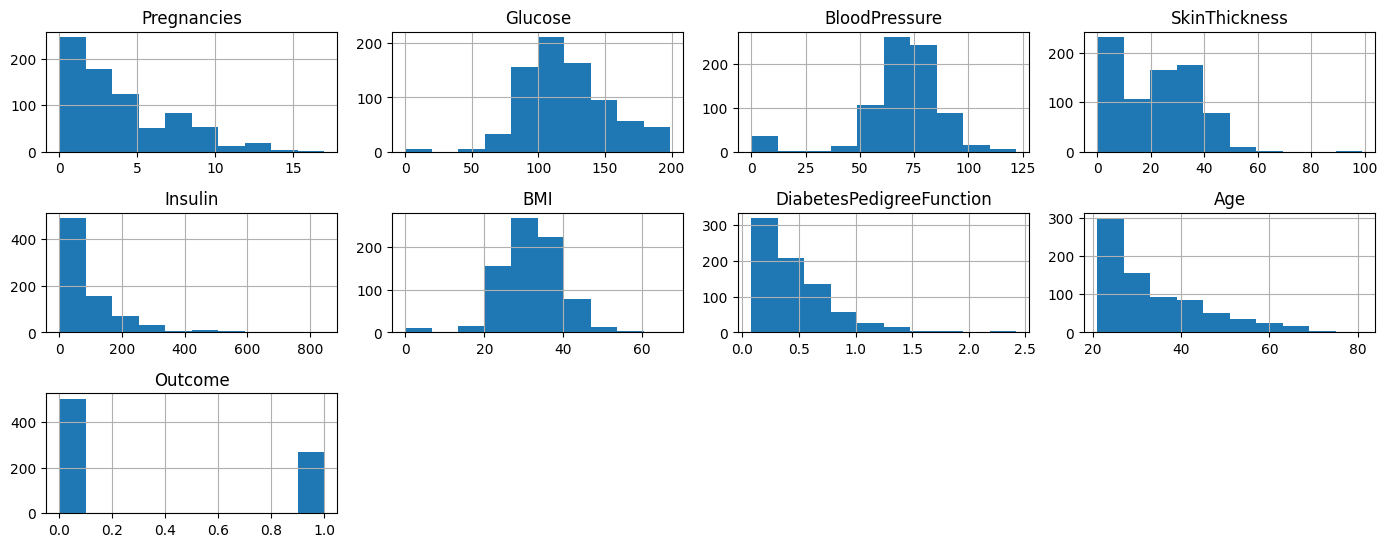

In [10]:
# Histograms for all numerical variables
fig = plt.figure(figsize=(14, 18))
for i, col in enumerate(num_columns):
    plt.subplot(10, 4, i + 1)
    df_dropped[col].hist()
    plt.title(col)

fig.tight_layout()
plt.show()

#### Heatmap for correlation between numerical variables

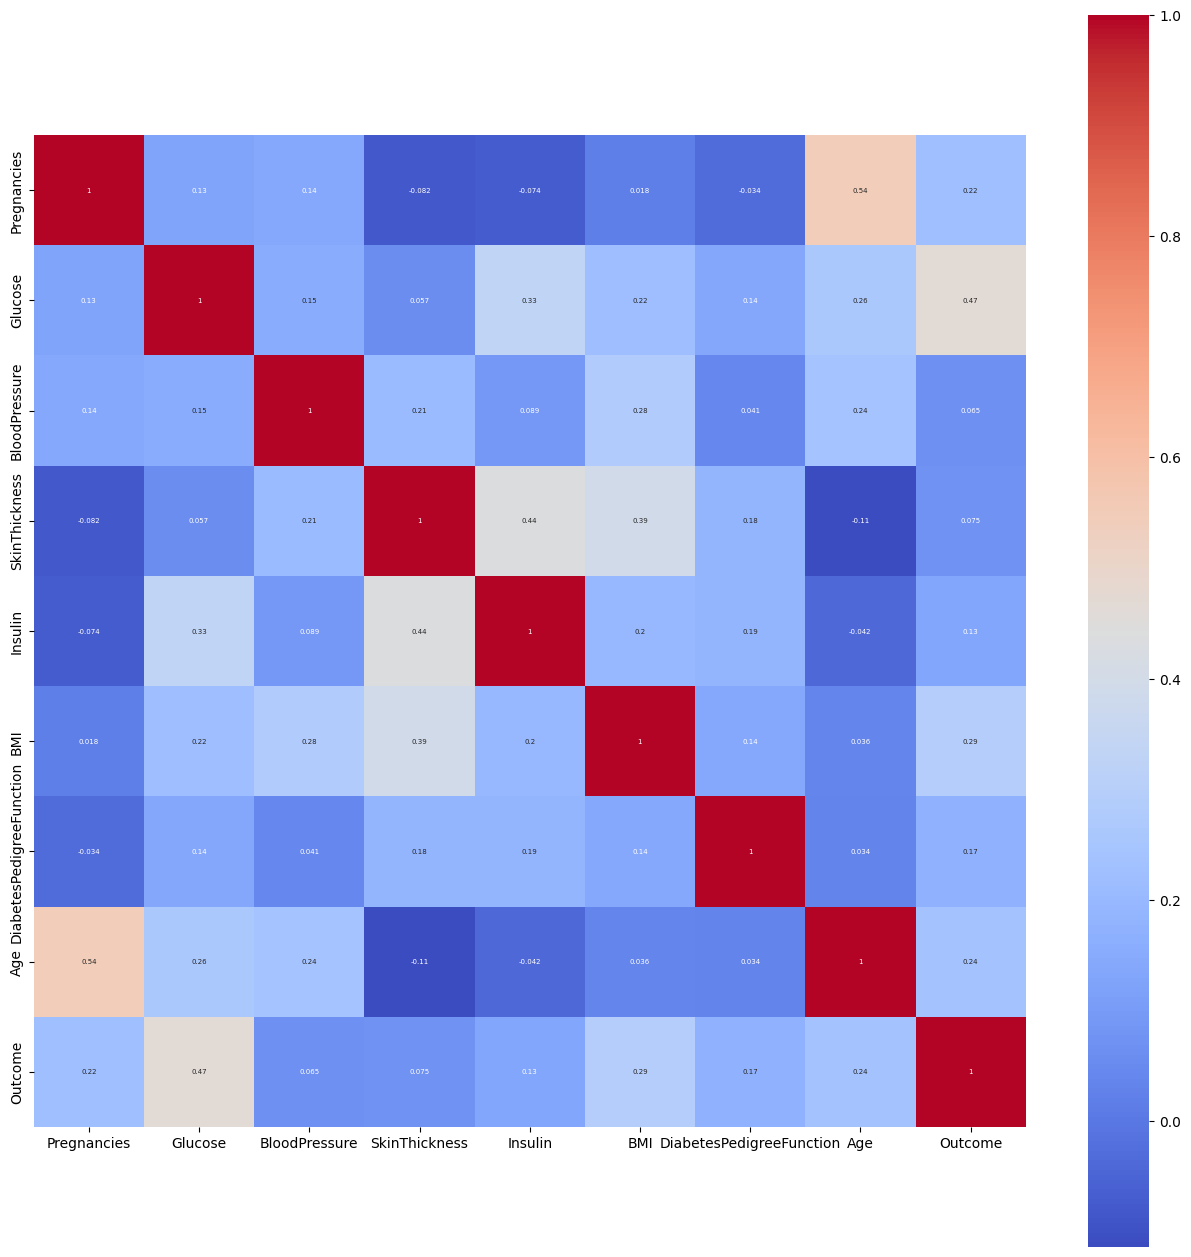

In [11]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(16, 16))
sns.heatmap(df_dropped[num_columns].corr(), annot=True, square=True, cmap='coolwarm', annot_kws={"size": 5})
plt.show()

### Handling Outliers

#### Box plots for numerical variables

In [12]:
df_clean = df_dropped.copy()

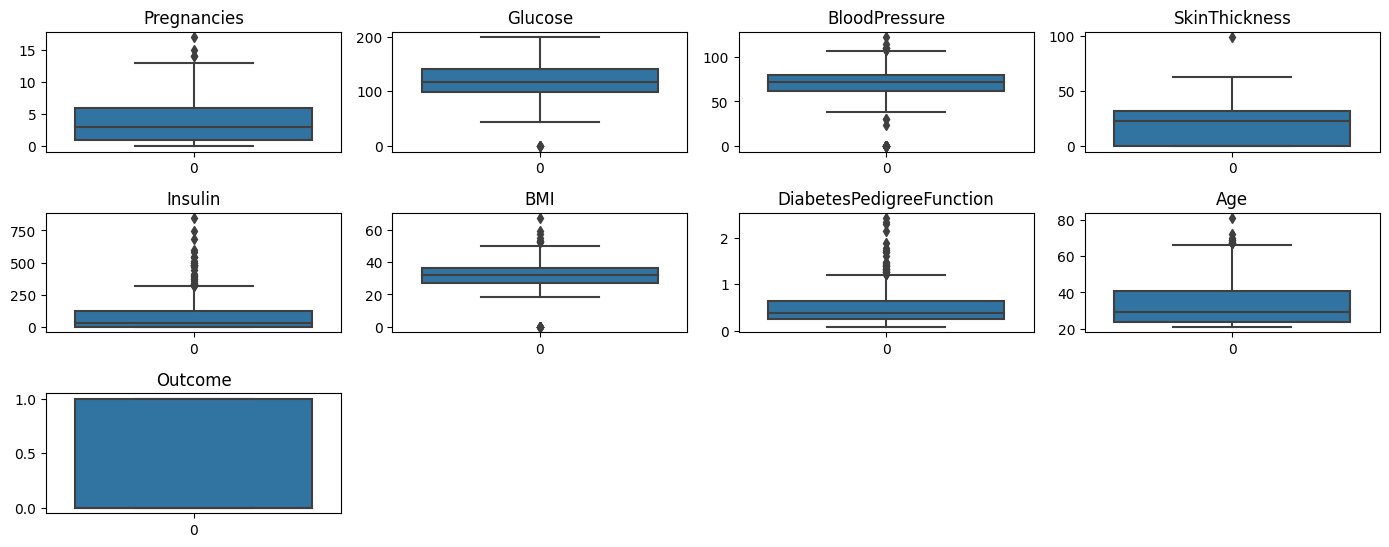

In [13]:
# Box plots for all numerical variables
fig = plt.figure(figsize=(14, 18))
for i, col in enumerate(num_columns):
    plt.subplot(10, 4, i + 1)
    sns.boxplot(df_clean[col])
    plt.title(col)

fig.tight_layout()
plt.show()

In the above boxplots we can see that there are data that are beyond the inter quartile ranges. So, if we use IQR method to remove the outliers it will remove nearly half of the data (already tried). Also, with Z-score method with 3 standard deviation as threshold removes around 30% of the data (already tried as well). So, I checked the histograms and the data description and then figured out that the data points that seems like outliers in the box plots are little bit rare but possible and logical data points. So, instead of removing them I decided to keep all of them. The code for IQR and Z-score method I used is mentioned below:

IQR method:



In [14]:
"""
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)
    return df.loc[filter]  

for col in num_columns:
    df_clean = remove_outliers(df_clean, col)
"""

'\ndef remove_outliers(df, col):\n    Q1 = df[col].quantile(0.25)\n    Q3 = df[col].quantile(0.75)\n    IQR = Q3 - Q1\n    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)\n    return df.loc[filter]  \n\nfor col in num_columns:\n    df_clean = remove_outliers(df_clean, col)\n'

Z-score method:

In [15]:
"""
# Define a threshold
threshold = 3

# For each numeric column, if the zscore is greater than threshold, remove it
for col in num_columns:
    df_clean = df_clean[(np.abs(zscore(df_clean[col])) < threshold)]
"""

'\n# Define a threshold\nthreshold = 3\n\n# For each numeric column, if the zscore is greater than threshold, remove it\nfor col in num_columns:\n    df_clean = df_clean[(np.abs(zscore(df_clean[col])) < threshold)]\n'

# Plot relationship between variables 

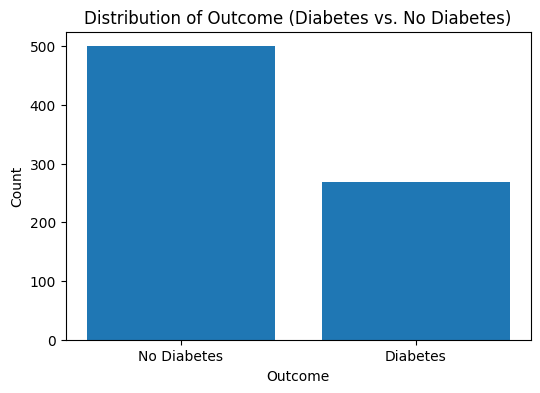

In [16]:
# Count the occurrences of each outcome (0: No diabetes, 1: Diabetes)
outcome_counts = df['Outcome'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(outcome_counts.index, outcome_counts.values, tick_label=['No Diabetes', 'Diabetes'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome (Diabetes vs. No Diabetes)')

# Show the plot
plt.show()

In the figure we can see, the number of Outcomes with no diabetes is almost double compared to that with diabetes which makes sure that the data is unbalanced.

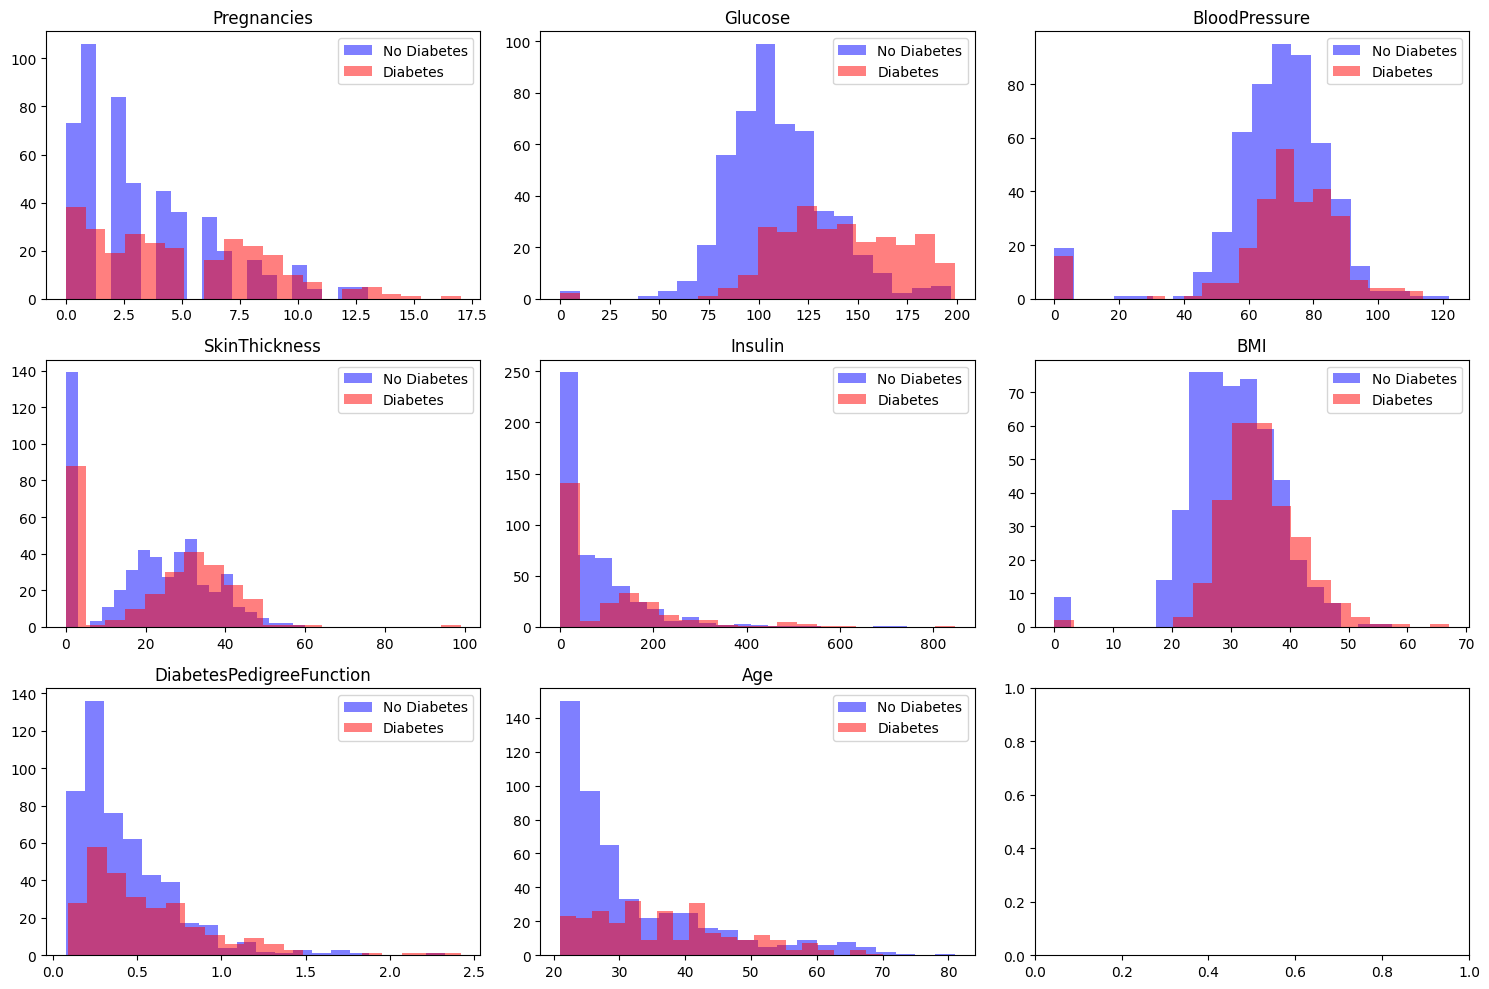

In [17]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Features to plot (excluding 'Outcome' which is the target variable)
features = df.columns[:-1]

# Plot histograms for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    ax.hist(df[df['Outcome'] == 0][feature], alpha=0.5, label='No Diabetes', color='blue', bins=20)
    ax.hist(df[df['Outcome'] == 1][feature], alpha=0.5, label='Diabetes', color='red', bins=20)
    ax.set_title(feature)
    ax.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

Subplots with histograms are created to visualize the distribution of different features, distinguishing between 'No Diabetes' and 'Diabetes' cases in a DataFrame.

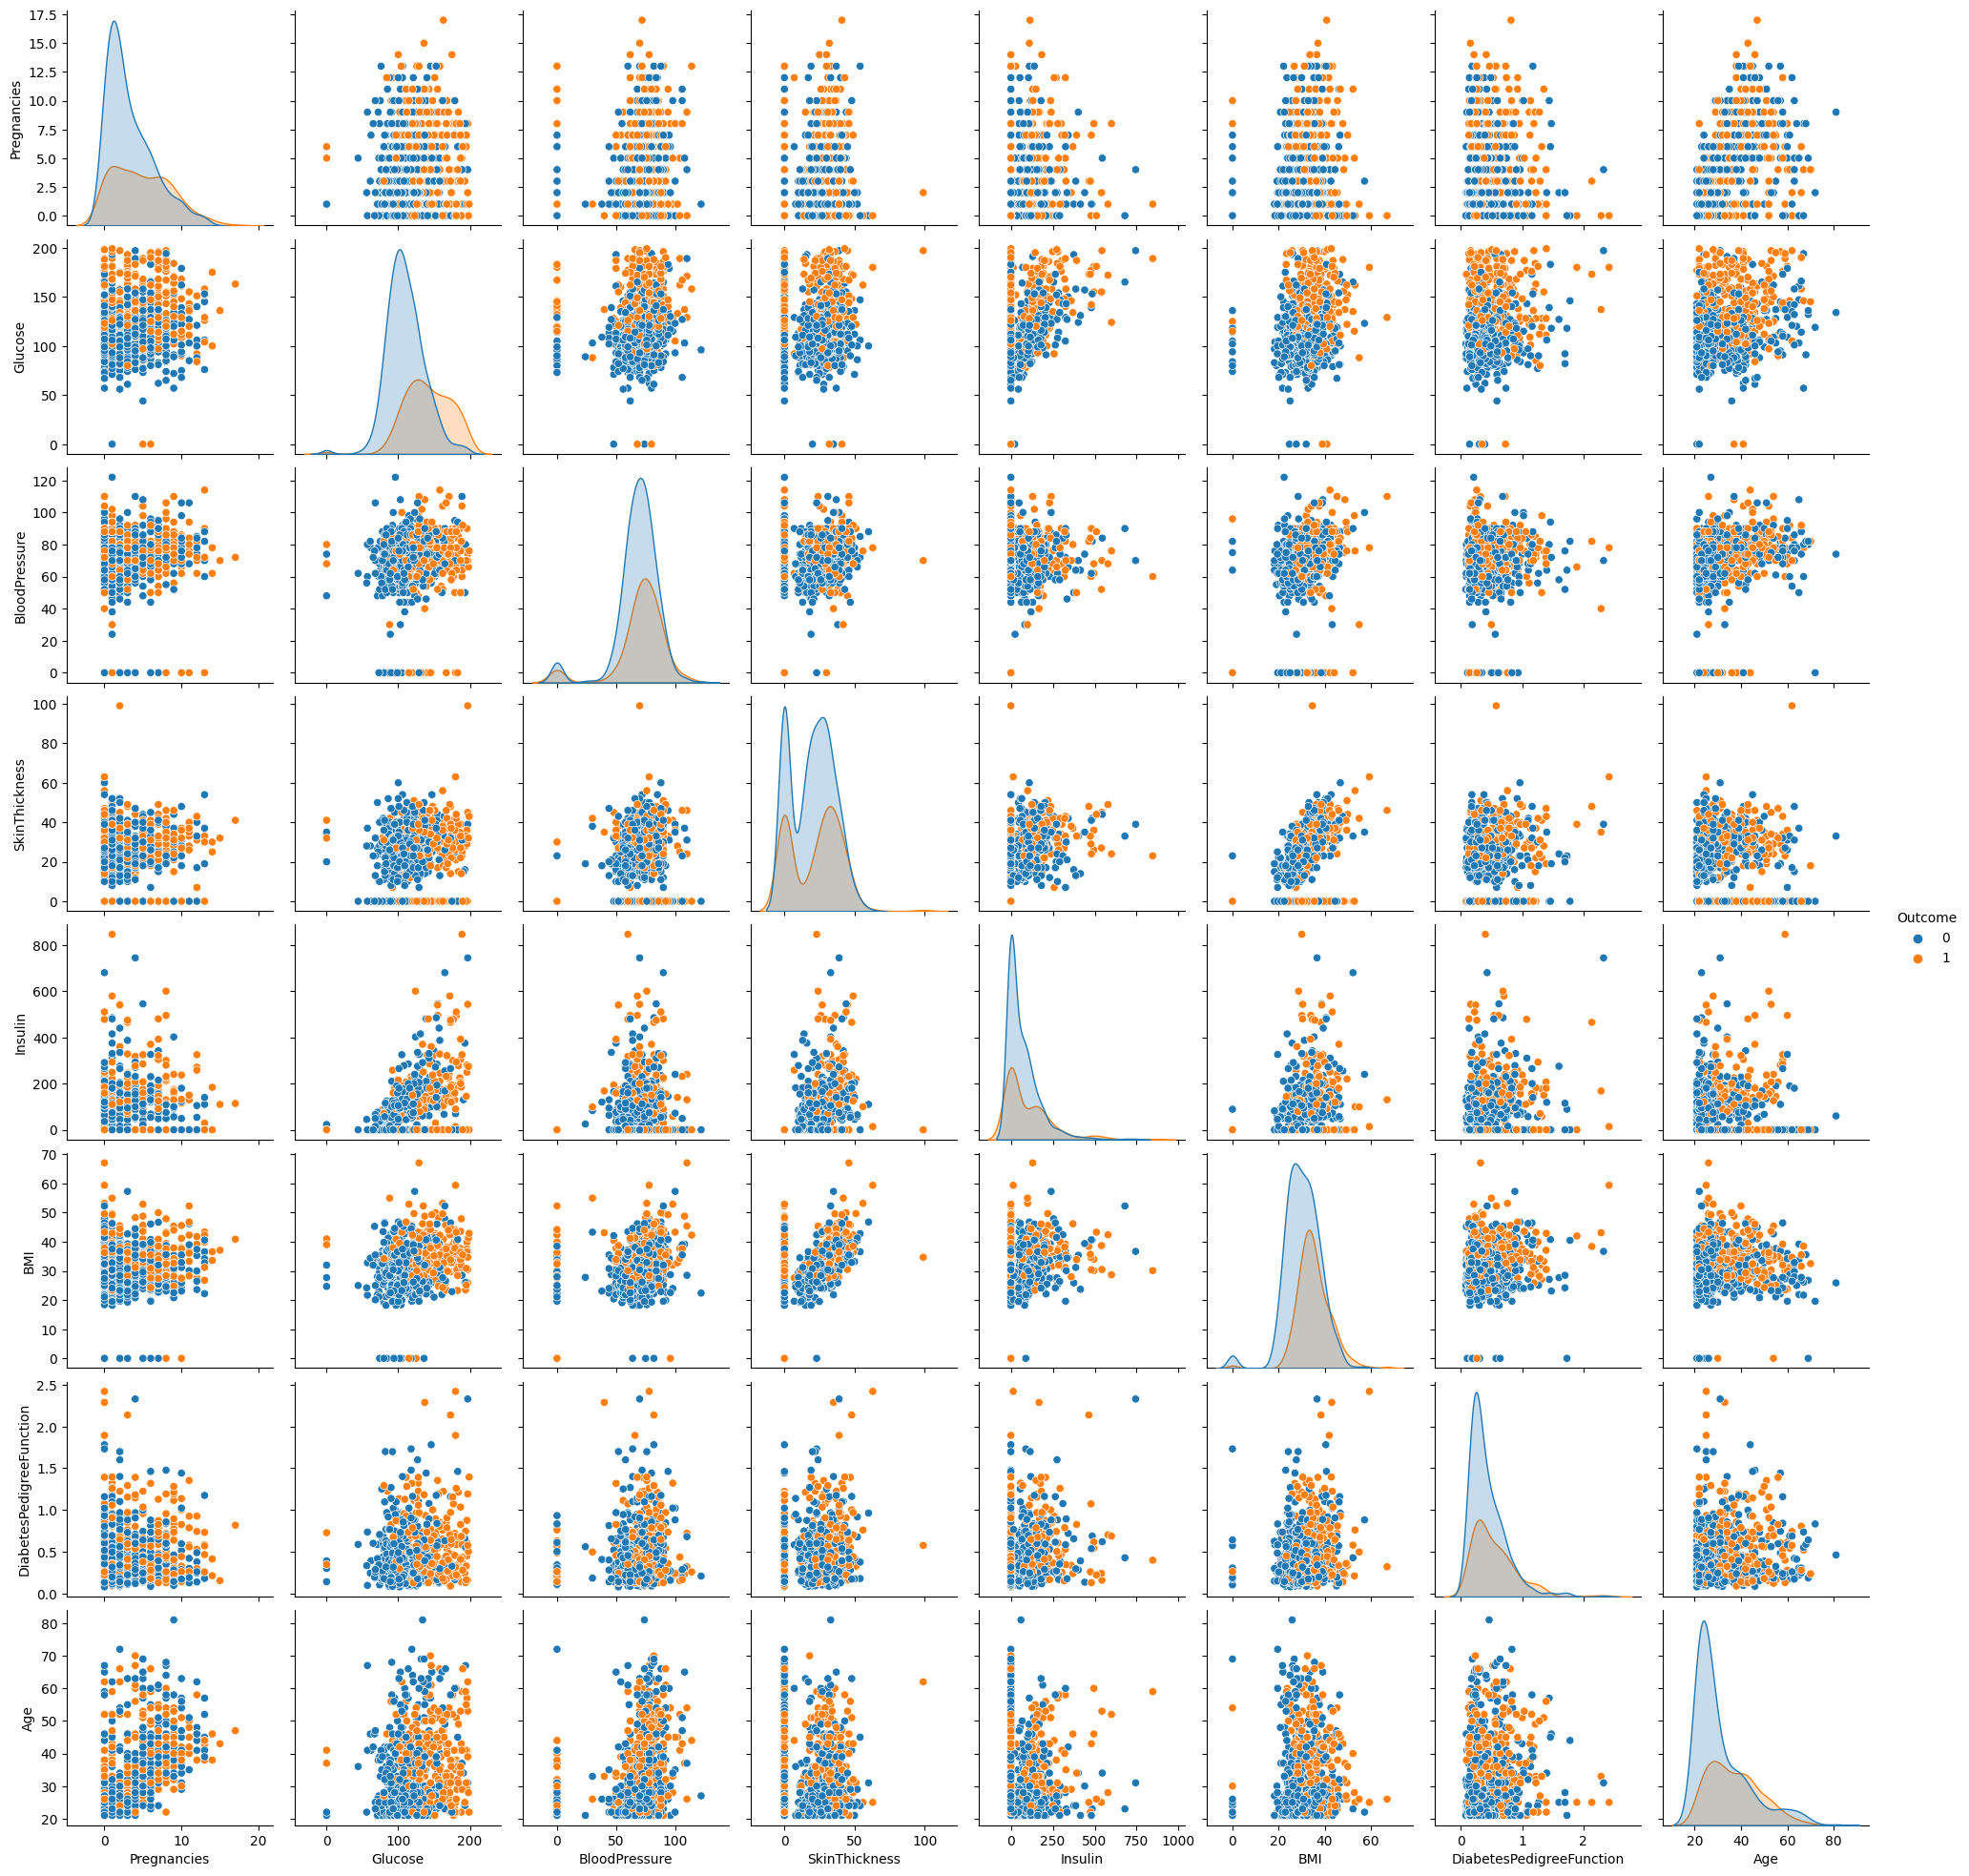

In [18]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

Visualize the pairwise relationships between features in a DataFrame, with differentiating colors for 'Outcome' values (typically 'No Diabetes' and 'Diabetes'), and includes kernel density estimation (KDE) plots on the diagonal for feature distributions.

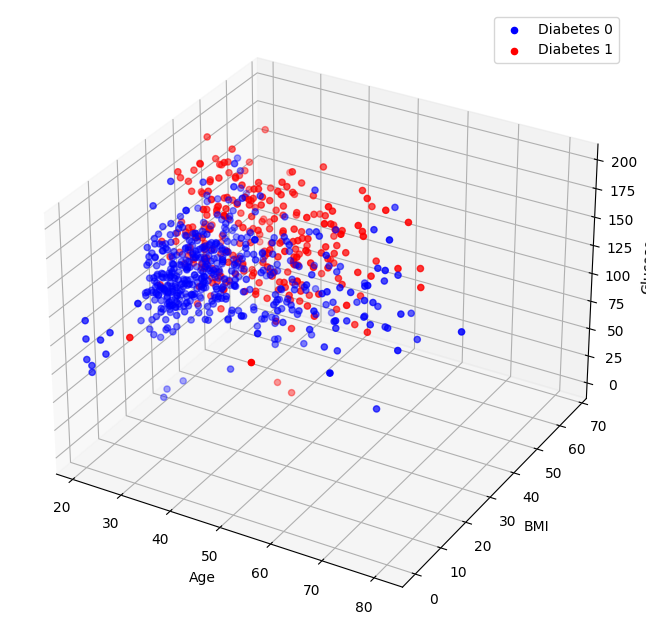

In [19]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors for diabetes status (0 for No Diabetes, 1 for Diabetes)
colors = {0: 'blue', 1: 'red'}

# Scatter plot with Age on the x-axis, BMI on the y-axis, and Glucose on the z-axis
for outcome, color in colors.items():
    subset = df[df['Outcome'] == outcome]
    ax.scatter(subset['Age'], subset['BMI'], subset['Glucose'], c=color, label=f'Diabetes {outcome}')

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Glucose')

# Add a legend
ax.legend()

# Show the 3D scatter plot
plt.show()


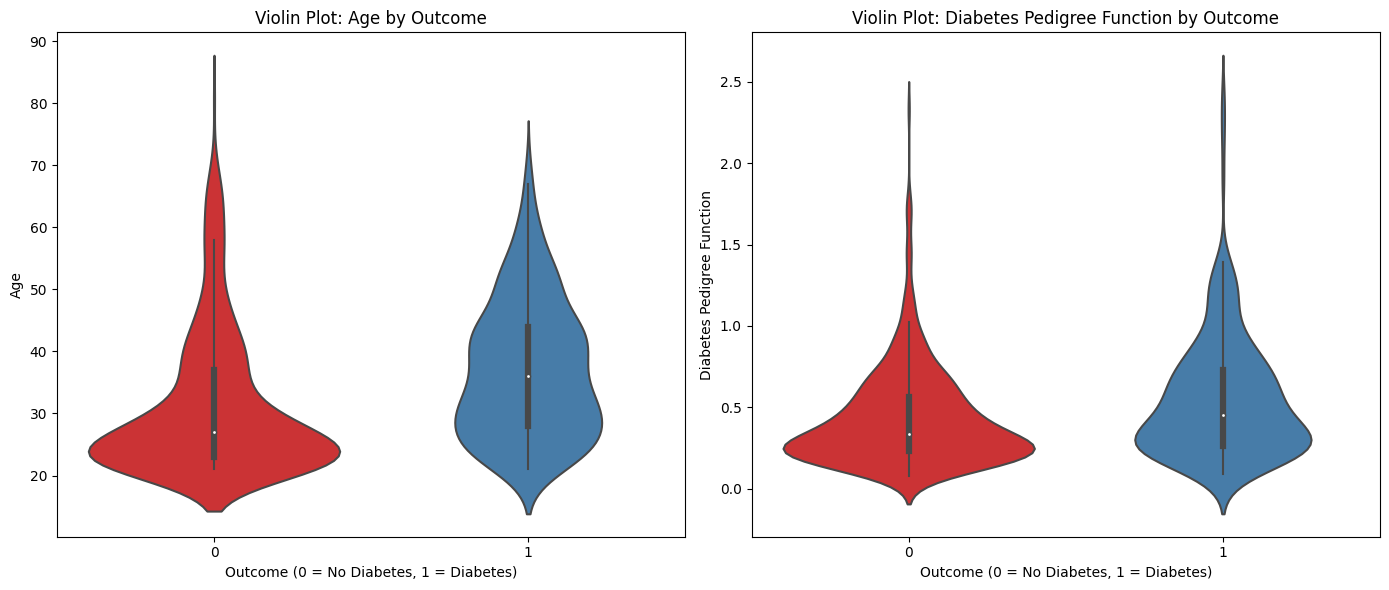

In [20]:
# Create subplots with two violin plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Violin Plot 1: Age by Outcome (Diabetes vs. No Diabetes)
sns.violinplot(x='Outcome', y='Age', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Violin Plot: Age by Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Age')

# Violin Plot 2: Diabetes Pedigree Function by Outcome (Diabetes vs. No Diabetes)
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Violin Plot: Diabetes Pedigree Function by Outcome')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Diabetes Pedigree Function')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()


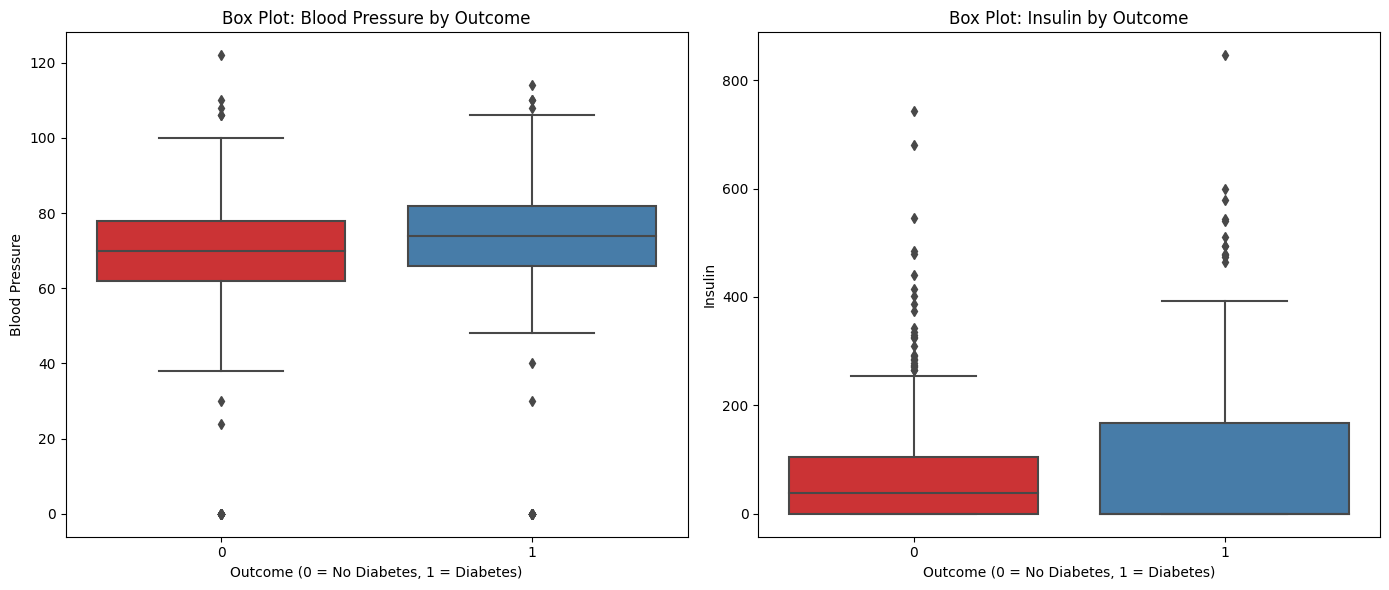

In [21]:
# Create subplots with two box plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot 1: Blood Pressure by Outcome (Diabetes vs. No Diabetes)
sns.boxplot(x='Outcome', y='BloodPressure', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Box Plot: Blood Pressure by Outcome')
axes[0].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[0].set_ylabel('Blood Pressure')

# Box Plot 2: Insulin by Outcome (Diabetes vs. No Diabetes)
sns.boxplot(x='Outcome', y='Insulin', data=df, palette='Set1', ax=axes[1])
axes[1].set_title('Box Plot: Insulin by Outcome')
axes[1].set_xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
axes[1].set_ylabel('Insulin')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

### Pre-processing for Machine Learning

In [22]:
# Extract the features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Splitting the data

In [23]:
# Split the data into training and testing sets using stratify to split based on the target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### Feature Scaling

In [24]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Handling Imbalance

In [25]:
fig = px.pie(y_train,names='Outcome')
fig.update_layout(title='<b>Outcome Proportion before SMOTE Upsampling</b>')
fig.show()

In [26]:
# transform the dataset
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

print(pd.Series(y_train).value_counts())

Outcome
0    400
1    400
Name: count, dtype: int64


### Model Selection and Training

In [27]:
# Define a list of classifiers to evaluate
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=2000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('SVM', SVC(kernel='rbf', C=1)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=7)),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy')),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50))
]

# Print evaluation results with improved formatting
for name, classifier in classifiers:
    # Fit the model on the training data
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = classifier.predict(X_test)
    
    print(f"{name}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    print("-" * 50)

Logistic Regression

Accuracy: 0.7597

Confusion Matrix:
[[77 23]
 [14 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       100
           1       0.63      0.74      0.68        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154

--------------------------------------------------
Random Forest

Accuracy: 0.7532

Confusion Matrix:
[[77 23]
 [15 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       100
           1       0.63      0.72      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154

--------------------------------------------------
XGBoost

Accuracy: 0.7597

Confusion Matrix:
[[78 

### Cross-Validation

In [31]:
# Perform 10-fold cross-validation for each model
for name, classifier in classifiers:
    # Create a KFold cross-validator
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Perform cross-validation
    scores = cross_val_score(classifier, X_train, y_train, cv=kf)
    
    # Print model name and cross-validation scores
    print(name)
    print("-" * 20)
    
    # Calculate and print the mean and standard deviation of the cross-validation scores
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"Mean Accuracy: {mean_score:.4f}")
    print(f"Standard Deviation: {std_score:.4f}")
    
    # Print a separator for better readability
    print("-" * 100)

Logistic Regression
--------------------
Mean Accuracy: 0.7500
Standard Deviation: 0.0280
----------------------------------------------------------------------------------------------------
Random Forest
--------------------
Mean Accuracy: 0.8162
Standard Deviation: 0.0316
----------------------------------------------------------------------------------------------------
XGBoost
--------------------
Mean Accuracy: 0.8113
Standard Deviation: 0.0442
----------------------------------------------------------------------------------------------------
SVM
--------------------
Mean Accuracy: 0.7500
Standard Deviation: 0.0274
----------------------------------------------------------------------------------------------------
K-Nearest Neighbors
--------------------
Mean Accuracy: 0.7675
Standard Deviation: 0.0384
----------------------------------------------------------------------------------------------------
Naive Bayes
--------------------
Mean Accuracy: 0.7288
Standard Deviation: 0.04